In [26]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Line Plots

Text(0.5, 0.92, 'Line Plot')

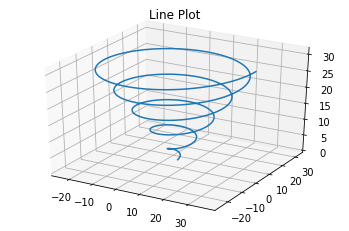

In [4]:
#setting up pyplot objects
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

#parametric curve
t = np.linspace(0,10*3.1415,501)
x = 5 + t*np.cos(t)
y = 5 + t*np.sin(t)
z = t

#displaying curve
ax1.plot(x,y,z)
ax1.set_title("Line Plot")

# Scatter Plots

Text(0.5, 0.92, 'Scatter Plot')

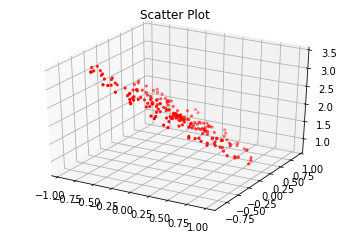

In [5]:
#setting up pyplot objects
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

#sampling from unit disc and adding a 3rd dimension
theta = np.random.uniform(0,2*3.14159,200)
rho = np.random.uniform(0,1,200)
x = rho * np.cos(theta)
y = rho * np.sin(theta)
z = 2 - x - y

#displaying scatter
ax1.scatter(x,y,z,s = 5,c='red',depthshade = True) # s = size, c = color, depthshade is true by default
ax1.set_title("Scatter Plot")

# Wireframe Plots

Text(0.5, 0.92, 'Wireframe')

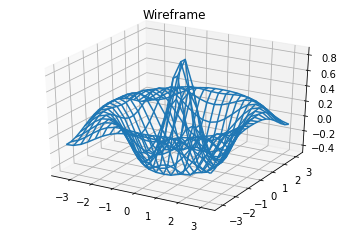

In [25]:
#setting up pyplot objects
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

#graphing cosine of distance from (0,0) times an exponential of distance from (0,0)
x = np.linspace(-3.415,3.1415,20)
y = np.linspace(-3.1415,3.1415,20)
x,y = np.meshgrid(x,y)
z = np.cos(2 * np.sqrt(x**2 + y**2)) * np.exp(-0.5*(np.sqrt(x**2 + y**2)))

#displaying wireframe
ax1.plot_wireframe(x,y,z)
ax1.set_title("Wireframe")

Text(0.5, 0.92, 'Scatter Plot')

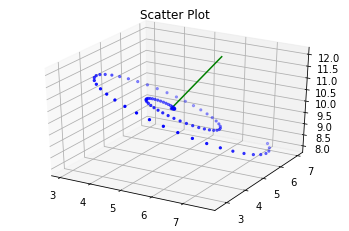

In [24]:
#setting up pyplot objects
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

#creating a spiral in i-j plane and keeping k constanct
theta = np.linspace(0,4 * 3.14159,81)
rho = np.linspace(0,2,81)
i = rho * np.cos(theta)
j = rho * np.sin(theta)
k = 5 * np.ones_like(i)
basis_points = np.row_stack([i,j,k])

#Since k is constant in the old coordinates, and L is a normal matrix
#(1,1,2) is normal to the plane containing all points in the new coordinates
L = np.array([[1,-1,1],
              [1,1,1],
              [-1,0,2]])

points = np.matmul(L,basis_points)
x,y,z = points

#displaying scatter in x,y,z coordinates
ax1.scatter(x,y,z,s = 5,c='blue',depthshade = True) # s = size, c = color, depthshade is true by default

#plotting the normal vector (1,1,2) at the point (x0,y0,z0)
x0,y0,z0 = [x[0],y[0],z[0]]
x1,y1,z1 = np.array([x0,y0,z0]) + np.array([1,1,2])
ax1.plot([x0,x1],[y0,y1],[z0,z1],c='green')

ax1.set_title("Scatter Plot")

eigenvectors
[[ 0.40824829 -0.71479963 -0.56779822]
 [ 0.40824829 -0.41336644  0.81391739]
 [ 0.81649658  0.56408304 -0.12305958]]
obtained with eigenvalues
[0.         2.13496981 1.22971458]
respectively


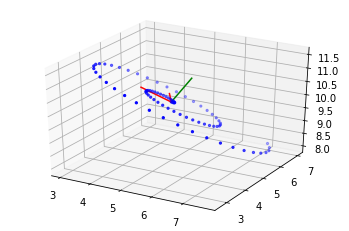

In [14]:
#setting up pyplot objects
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

#numpy calculation of covariance matrix and its eigenvalues/eigenvectors
covariance_matrix = np.cov(points)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print("eigenvectors")
print(eigen_vectors)
print("obtained with eigenvalues")
print(eigen_values)
print("respectively")

#displaying scatter
ax1.scatter(x,y,z,s = 5,c='blue',depthshade = True) # s = size, c = color, depthshade is true by default

#Plotting the normal eigenvector (0.408,0.408,0.408)
ax1.plot([x[0],x[0]+eigen_vectors[0][0]],[y[0],y[0]+eigen_vectors[1][0]],[z[0],z[0]+eigen_vectors[2][0]],c='green')

#Plotting the eigenvectors (-0.714,-0.413,0.564) and (-0.567,0.813,-0.123) inside the plane of the spiral
ax1.plot([x[0],x[0]+eigen_vectors[0][1]],[y[0],y[0]+eigen_vectors[1][1]],[z[0],z[0]+eigen_vectors[2][1]],c='red')
ax1.plot([x[0],x[0]+eigen_vectors[0][2]],[y[0],y[0]+eigen_vectors[1][2]],[z[0],z[0]+eigen_vectors[2][2]],c='red')

# Writing points in an eigenbasis

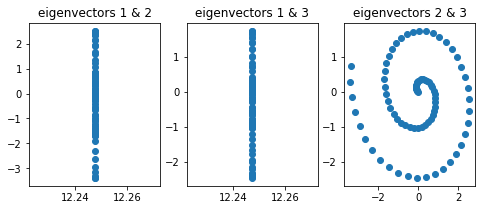

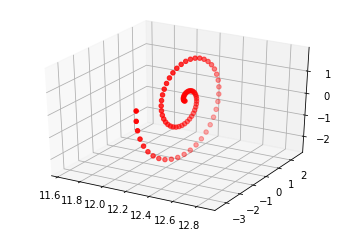

In [19]:
#linear transformation for stand coordinates to coordinates written in terms of eigenvectors
inv = np.linalg.inv(eigen_vectors)
basis_points = np.matmul(inv,points)
basis_x, basis_y, basis_z = basis_points

fig1,ax1 = plt.subplots(figsize=(8,3),nrows=1,ncols=3)
#comparison of all 2d eigenvector projections
ax1[0].scatter(basis_x,basis_y)
ax1[0].set_title("eigenvectors 1 & 2")
ax1[1].scatter(basis_x,basis_z)
ax1[1].set_title("eigenvectors 1 & 3")
ax1[2].scatter(basis_y,basis_z)
ax1[2].set_title("eigenvectors 2 & 3")


fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='3d')
#full 3d scatter of all eigenvector projections
ax2.scatter(basis_x,basis_y,basis_z,c = 'red')